In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tcga-gdc-10-tumor-types/gene_annotation.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LUAD.star_fpkm-uq.tsv/TCGA-LUAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-COAD.star_fpkm-uq.tsv/TCGA-COAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-SKCM.star_fpkm-uq.tsv/TCGA-SKCM.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PAAD.star_fpkm-uq.tsv/TCGA-PAAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-BRCA.star_fpkm-uq.tsv/TCGA-BRCA.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LIHC.star_fpkm-uq.tsv/TCGA-LIHC.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-GBM.star_fpkm-uq.tsv/TCGA-GBM.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PRAD.star_fpkm-uq.tsv/TCGA-PRAD.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-ESCA.star_fpkm-uq.tsv/TCGA-ESCA.star_fpkm-uq.tsv
/kaggle/input/tcga-gdc-10-tumor-types/TCGA-STAD.star_fpkm-uq.tsv/TCGA-STAD.star_fpkm-uq.tsv


In [2]:
#Import datasets
breast = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-BRCA.star_fpkm-uq.tsv/TCGA-BRCA.star_fpkm-uq.tsv', delimiter='\t')
colon = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-COAD.star_fpkm-uq.tsv/TCGA-COAD.star_fpkm-uq.tsv', delimiter='\t')
esophagus = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-ESCA.star_fpkm-uq.tsv/TCGA-ESCA.star_fpkm-uq.tsv', delimiter='\t')
brain = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-GBM.star_fpkm-uq.tsv/TCGA-GBM.star_fpkm-uq.tsv', delimiter='\t')
liver = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LIHC.star_fpkm-uq.tsv/TCGA-LIHC.star_fpkm-uq.tsv', delimiter='\t')
lung = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-LUAD.star_fpkm-uq.tsv/TCGA-LUAD.star_fpkm-uq.tsv', delimiter='\t')
pancreas = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PAAD.star_fpkm-uq.tsv/TCGA-PAAD.star_fpkm-uq.tsv', delimiter='\t')
prostate = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-PRAD.star_fpkm-uq.tsv/TCGA-PRAD.star_fpkm-uq.tsv', delimiter='\t')
skin = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-SKCM.star_fpkm-uq.tsv/TCGA-SKCM.star_fpkm-uq.tsv', delimiter='\t')
stomach = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/TCGA-STAD.star_fpkm-uq.tsv/TCGA-STAD.star_fpkm-uq.tsv', delimiter='\t')

In [3]:
gene_annotation = pd.read_csv('/kaggle/input/tcga-gdc-10-tumor-types/gene_annotation.tsv', delimiter='\t')

In [4]:
tumor_types = ['breast','colon','esophagus','brain','liver','lung','pancreas','prostate','skin','stomach']

In [5]:
breast = breast.drop(breast.filter(like="-11A", axis=1).columns, axis=1)
colon = colon.drop(colon.filter(like="-11A", axis=1).columns, axis=1)
esophagus = esophagus.drop(esophagus.filter(like="-11A", axis=1).columns, axis=1)
brain = brain.drop(brain.filter(like="-11A", axis=1).columns, axis=1)
liver = liver.drop(liver.filter(like="-11A", axis=1).columns, axis=1)
lung = lung.drop(lung.filter(like="-11A", axis=1).columns, axis=1)
pancreas = pancreas.drop(pancreas.filter(like="-11A", axis=1).columns, axis=1)
prostate = prostate.drop(prostate.filter(like="-11A", axis=1).columns, axis=1)
skin = skin.drop(skin.filter(like="-11A", axis=1).columns, axis=1)
stomach = stomach.drop(stomach.filter(like="-11A", axis=1).columns, axis=1)

In [6]:
print(breast.shape)
print(colon.shape)
print(esophagus.shape)
print(brain.shape)
print(liver.shape)
print(lung.shape)
print(pancreas.shape)
print(prostate.shape)
print(skin.shape)
print(stomach.shape)

(60660, 1128)
(60660, 474)
(60660, 186)
(60660, 171)
(60660, 375)
(60660, 532)
(60660, 180)
(60660, 504)
(60660, 473)
(60660, 413)


In [7]:
breast = breast.round(3)
colon = colon.round(3)
esophagus = esophagus.round(3)
brain = brain.round(3)
liver = liver.round(3)
lung = lung.round(3)
pancreas = pancreas.round(3)
prostate = prostate.round(3)
skin = skin.round(3)
stomach = stomach.round(3)

threshold = 0.3

# Drop rows
rows_to_keep = breast.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_breast = breast[rows_to_keep]

rows_to_keep = colon.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_colon = colon[rows_to_keep]

rows_to_keep = esophagus.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_esophagus = esophagus[rows_to_keep]

rows_to_keep = brain.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_brain = brain[rows_to_keep]

rows_to_keep = liver.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_liver = liver[rows_to_keep]

rows_to_keep = lung.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_lung = lung[rows_to_keep]

rows_to_keep = pancreas.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_pancreas = pancreas[rows_to_keep]

rows_to_keep = prostate.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_prostate = prostate[rows_to_keep]

rows_to_keep = skin.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_skin = skin[rows_to_keep]

rows_to_keep = stomach.apply(lambda row: (row == 0.000).mean() <= threshold, axis=1)
filtered_stomach = stomach[rows_to_keep]

In [8]:
print(filtered_breast.shape)
print(filtered_colon.shape)
print(filtered_esophagus.shape)
print(filtered_brain.shape)
print(filtered_liver.shape)
print(filtered_lung.shape)
print(filtered_pancreas.shape)
print(filtered_prostate.shape)
print(filtered_skin.shape)
print(filtered_stomach.shape)

(27516, 1128)
(24603, 474)
(34361, 186)
(29723, 171)
(23386, 375)
(27774, 532)
(27936, 180)
(27570, 504)
(25536, 473)
(32867, 413)


In [9]:
breast_ids = filtered_breast.columns.tolist()
colon_ids = filtered_colon.columns.tolist()
esophagus_ids = filtered_esophagus.columns.tolist()
brain_ids = filtered_brain.columns.tolist()
liver_ids = filtered_liver.columns.tolist()
lung_ids = filtered_lung.columns.tolist()
pancreas_ids = filtered_pancreas.columns.tolist()
prostate_ids = filtered_prostate.columns.tolist()
skin_ids = filtered_skin.columns.tolist()
stomach_ids = filtered_stomach.columns.tolist()

#print(colon_ids)
#print(liver_ids)
#print(lung_ids)

In [10]:
print(colon_ids)
#print(liver_ids)
#print(lung_ids)

['Ensembl_ID', 'TCGA-5M-AAT6-01A', 'TCGA-AA-3552-01A', 'TCGA-AA-3867-01A', 'TCGA-AD-6895-01A', 'TCGA-AA-3560-01A', 'TCGA-CM-6676-01A', 'TCGA-AA-A029-01A', 'TCGA-AA-A01C-01A', 'TCGA-CK-5912-01A', 'TCGA-AA-A03F-01A', 'TCGA-CA-5256-01A', 'TCGA-AA-3844-01A', 'TCGA-CM-6162-01A', 'TCGA-AZ-4684-01A', 'TCGA-AA-3939-01A', 'TCGA-A6-2680-01A', 'TCGA-A6-4105-01A', 'TCGA-F4-6807-01A', 'TCGA-AA-3842-01A', 'TCGA-A6-6781-01B', 'TCGA-CM-5863-01A', 'TCGA-AZ-4616-01A', 'TCGA-T9-A92H-01A', 'TCGA-AA-3811-01A', 'TCGA-AZ-4315-01A', 'TCGA-AA-3712-01A', 'TCGA-AA-3562-01A', 'TCGA-AA-3979-01A', 'TCGA-A6-2677-01A', 'TCGA-AZ-4681-01A', 'TCGA-AA-3972-01A', 'TCGA-AA-3516-01A', 'TCGA-CA-5255-01A', 'TCGA-AA-3858-01A', 'TCGA-AA-3675-01A', 'TCGA-AY-A8YK-01A', 'TCGA-G4-6307-01A', 'TCGA-AA-3713-01A', 'TCGA-AA-3561-01A', 'TCGA-A6-6652-01A', 'TCGA-AZ-6603-01A', 'TCGA-AD-6965-01A', 'TCGA-AA-A00D-01A', 'TCGA-AA-3819-01A', 'TCGA-AA-3971-01A', 'TCGA-AA-3986-01A', 'TCGA-3L-AA1B-01A', 'TCGA-D5-6529-01A', 'TCGA-A6-6653-01A', 'TCGA

In [11]:
gene_annotation = gene_annotation.rename(columns={'id': 'Ensembl_ID'})
gene_annotation.head()

,Ensembl_ID,gene,chrom,chromStart,chromEnd,strand
0,ENSG00000223972.5,DDX11L1,chr1,11869,14409,+
1,ENSG00000227232.5,WASH7P,chr1,14404,29570,-
2,ENSG00000278267.1,MIR6859-1,chr1,17369,17436,-
3,ENSG00000243485.5,MIR1302-2HG,chr1,29554,31109,+
4,ENSG00000284332.1,MIR1302-2,chr1,30366,30503,+


In [12]:
merged_entities = pd.merge(filtered_breast, filtered_colon, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_esophagus, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_brain, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_liver, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_lung, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_pancreas, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_prostate, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_skin, on=['Ensembl_ID'], how='inner')
merged_entities = pd.merge(merged_entities, filtered_stomach, on=['Ensembl_ID'], how='inner')

merged_entities = pd.merge(gene_annotation, merged_entities, on=['Ensembl_ID'], how='inner')

In [13]:
print(merged_entities.shape)
merged_entities = merged_entities.drop(columns=['Ensembl_ID', 'chrom', 'chromStart', 'chromEnd', 'strand'])
merged_entities.head()
print(merged_entities.shape)

(21049, 4432)
(21049, 4427)


In [14]:
transposed = merged_entities.T

In [15]:
# Step 2: Set the first row as column names
transposed.columns = transposed.iloc[0]

# Step 3: Drop the first row, as it's now used as column names
transposed = transposed.drop(transposed.index[0])

# Optional: Reset index (if needed)
transposed = transposed.reset_index(drop=False)

In [16]:
transposed.head()

gene,index,WASH7P,AL627309.6,AL627309.7,AL627309.5,WASH9P,AP006222.1,AL732372.2,AL669831.3,MTND1P23,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP
0,TCGA-D8-A146-01A,0.508,0.616,1.085,0.019,1.301,0.069,0.057,0.017,1.026,...,10.18,11.729,12.304,11.593,10.372,12.102,10.509,10.821,11.803,8.001
1,TCGA-AQ-A0Y5-01A,0.39,0.379,0.453,0.013,0.858,0.042,0.032,0.027,0.809,...,9.961,11.796,12.612,11.002,10.98,12.335,9.963,10.001,11.59,9.609
2,TCGA-C8-A274-01A,0.248,0.235,0.41,0.04,0.796,0.021,0.067,0.038,1.367,...,11.189,12.46,13.659,11.318,11.597,12.918,10.036,9.812,12.202,9.702
3,TCGA-BH-A0BD-01A,0.475,1.14,1.971,0.065,1.439,0.006,0.131,0.012,1.109,...,9.851,11.626,12.095,10.837,10.253,12.031,10.2,10.547,11.496,8.765
4,TCGA-B6-A1KC-01B,0.216,0.0,0.0,0.084,0.779,0.011,0.057,0.024,2.257,...,11.94,13.579,14.267,12.363,12.428,14.305,12.033,12.175,13.282,10.075


In [17]:
## generate a second dataframe with met samples, i.e containing '-06' in the identifier

mets = transposed['index'].str.contains('-06', '-07')
metastases = transposed[mets]  # Rows containing '-06'
primary_tumors = transposed[~mets]  # Rows without '-06'

In [18]:
metastases.shape

(449, 21050)

In [19]:
metastases.head()

gene,index,WASH7P,AL627309.6,AL627309.7,AL627309.5,WASH9P,AP006222.1,AL732372.2,AL669831.3,MTND1P23,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP
125,TCGA-E2-A15K-06A,0.666,0.121,0.0,0.05,1.409,0.149,0.089,0.055,0.439,...,10.285,12.175,12.492,11.86,10.964,12.727,11.108,11.318,12.134,8.941
278,TCGA-BH-A18V-06A,0.719,0.985,1.624,0.02,1.533,0.005,0.131,0.023,0.638,...,9.246,11.411,12.437,11.866,11.061,12.448,11.068,11.088,11.865,10.378
429,TCGA-E2-A15A-06A,0.426,0.655,1.66,0.028,1.172,0.046,0.058,0.039,0.402,...,8.993,10.83,11.637,10.666,9.806,11.44,9.686,9.758,11.012,8.197
846,TCGA-BH-A1FE-06A,0.338,0.941,1.395,0.024,0.594,0.015,0.033,0.009,1.285,...,9.896,11.76,12.285,11.46,10.907,12.551,10.304,10.528,11.587,9.686
903,TCGA-BH-A1ES-06A,1.386,1.922,1.663,0.042,2.006,0.042,0.076,0.072,0.202,...,7.63,10.492,10.444,11.484,7.268,9.525,7.139,7.071,9.927,6.255


In [20]:
primary_tumors.shape

(3977, 21050)

In [21]:
#Actually scaling is not necessary for CatBoost
from sklearn.preprocessing import RobustScaler

# Step 1: Separate the first two columns (do not scale them)
non_scaled_columns = transposed.iloc[:, :1]  # First two columns (do not scale)
columns_to_scale = transposed.iloc[:, 1:]     # All columns except the first two

# Step 2: Initialize the RobustScaler and fit it to the columns to scale
rb_scaler = RobustScaler()
scaled_columns = rb_scaler.fit_transform(columns_to_scale)

# Step 3: Convert scaled columns back into a DataFrame and retain original column names
scaled_columns_df = pd.DataFrame(scaled_columns, columns=columns_to_scale.columns)

# Step 4: Concatenate the non-scaled columns with the scaled columns
scaled_data = pd.concat([non_scaled_columns, scaled_columns_df], axis=1)

# Display the result
scaled_data.head()

gene,index,WASH7P,AL627309.6,AL627309.7,AL627309.5,WASH9P,AP006222.1,AL732372.2,AL669831.3,MTND1P23,...,MT-ATP8,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP
0,TCGA-D8-A146-01A,-0.229537,-0.316490,-0.217977,-0.210526,-0.010218,0.760870,-0.169811,-0.28125,-0.256747,...,0.160723,-0.234381,-0.466145,-0.125884,-0.376403,-0.437951,0.126043,0.166242,-0.133866,-0.987380
1,TCGA-AQ-A0Y5-01A,-0.439502,-0.466656,-0.548737,-0.368421,-0.613760,0.173913,-0.405660,0.03125,-0.366204,...,0.019364,-0.182383,-0.231165,-0.533540,0.037062,-0.265582,-0.261672,-0.356051,-0.281989,0.080704
2,TCGA-C8-A274-01A,-0.692171,-0.557896,-0.571242,0.342105,-0.698229,-0.282609,-0.075472,0.37500,-0.084741,...,0.812006,0.332945,0.567614,-0.315572,0.456647,0.165711,-0.209835,-0.476433,0.143602,0.142478
3,TCGA-BH-A0BD-01A,-0.288256,0.015524,0.245715,1.000000,0.177793,-0.608696,0.528302,-0.43750,-0.214880,...,-0.051638,-0.314319,-0.625596,-0.647353,-0.457327,-0.490475,-0.093378,-0.008280,-0.347357,-0.479907
4,TCGA-B6-A1KC-01B,-0.749110,-0.706796,-0.785817,1.500000,-0.721390,-0.500000,-0.169811,-0.06250,0.364187,...,1.296756,1.201397,1.031471,0.405242,1.021761,1.191788,1.208237,1.028662,0.894645,0.390236


In [22]:
TCGA_to_breast = {TCGA_: 'breast' for TCGA_ in breast_ids}
TCGA_to_colon = {TCGA_: 'colon' for TCGA_ in colon_ids}
TCGA_to_esophagus= {TCGA_: 'esophagus' for TCGA_ in esophagus_ids}
TCGA_to_brain = {TCGA_: 'brain' for TCGA_ in brain_ids}
TCGA_to_liver = {TCGA_: 'liver' for TCGA_ in liver_ids}
TCGA_to_lung = {TCGA_: 'lung' for TCGA_ in lung_ids}
TCGA_to_pancreas = {TCGA_: 'pancreas' for TCGA_ in pancreas_ids}
TCGA_to_prostate = {TCGA_: 'prostate' for TCGA_ in prostate_ids}
TCGA_to_skin = {TCGA_: 'skin' for TCGA_ in skin_ids}
TCGA_to_stomach = {TCGA_: 'stomach' for TCGA_ in stomach_ids}

# Combine the dictionaries in one step
TCGA_to_organ = {**TCGA_to_breast, **TCGA_to_colon, **TCGA_to_esophagus, **TCGA_to_brain, **TCGA_to_liver, **TCGA_to_lung, **TCGA_to_pancreas, **TCGA_to_prostate, **TCGA_to_skin, **TCGA_to_stomach}
#print(TCGA_to_organ)

In [23]:
first_key = next(iter(TCGA_to_organ)) 
TCGA_to_organ.pop(first_key)  

'stomach'

In [24]:
scaled_data.shape

(4426, 21050)

In [25]:
scaled_data['tumor_type'] = scaled_data['index'].map(TCGA_to_organ)

In [26]:
scaled_data.tail()

gene,index,WASH7P,AL627309.6,AL627309.7,AL627309.5,WASH9P,AP006222.1,AL732372.2,AL669831.3,MTND1P23,...,MT-ATP6,MT-CO3,MT-ND3,MT-ND4L,MT-ND4,MT-ND5,MT-ND6,MT-CYB,MT-TP,tumor_type
4421,TCGA-CG-4436-01A,-0.425267,0.293680,0.264556,1.394737,-0.812670,-0.673913,0.990566,0.37500,1.138966,...,1.172681,0.829296,0.277634,1.821489,0.965415,0.513758,-0.080255,1.293115,1.923281,stomach
4422,TCGA-BR-A4CR-01A,-0.149466,0.329796,0.704697,2.842105,0.687330,11.586957,0.216981,2.09375,0.819168,...,0.239814,0.019836,-0.289360,0.530772,0.463103,-0.322741,-0.493631,0.390473,1.047160,stomach
4423,TCGA-3M-AB47-01A,0.523132,-0.567401,-0.093942,-0.368421,-0.307221,0.913043,-0.556604,0.06250,5.291299,...,1.251843,1.822621,0.699086,1.225774,1.514333,1.306941,0.978344,2.050417,3.006642,stomach
4424,TCGA-BR-A4QI-01A,-0.115658,-0.455251,-0.217977,-0.421053,1.270436,0.000000,0.122642,1.50000,2.403026,...,0.834303,0.827770,0.297638,0.617137,0.586647,0.049352,0.015924,0.745828,1.545334,stomach
4425,TCGA-CG-4440-01A,-0.629893,-0.407096,-0.347246,-0.289474,-0.316757,-0.347826,4.603774,0.71875,0.414124,...,0.625534,0.505817,-0.427315,1.201292,0.857407,0.439198,-0.135669,0.553894,1.554633,stomach


In [27]:
#Perform the ANOVA testing

import pandas as pd
from sklearn.feature_selection import f_classif
import numpy as np

# Separate features and target
X = scaled_data.drop(columns=['index', 'tumor_type'])  # Drop the tumor_type column to keep only features
y = scaled_data['tumor_type']                                        # Use tumor_type as the target variable

# Perform ANOVA test
f_values, p_values = f_classif(X, y)

# Create a DataFrame for feature significance
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_value': f_values,
    'P_value': p_values
})

# Sort by p-value (ascending) and select the top 1000 features
top_features = feature_scores.nlargest(1000, 'F_value')

# Filter the original dataset for the top 1000 features
selected_features = top_features['Feature'].tolist()
X_selected = X[selected_features]

In [28]:
top_features.head(10)
#top_features.shape

,Feature,F_value,P_value
16707,GFAP,13754.861243,0.0
4030,ITIH3,6628.807774,0.0
16158,ASGR2,6442.650833,0.0
1686,SERPINC1,6413.434987,0.0
4375,ACP3,5604.116751,0.0
7830,TRGC1,5030.628522,0.0
10231,ITIH2,5014.504736,0.0
4600,SOX2-OT,4535.462683,0.0
16159,ASGR1,4514.702301,0.0
16377,VTN,4402.525313,0.0


In [29]:
# Concatenate selected features with the 'index' and 'tumor_type' columns
diff_genes = pd.concat(
    [X_selected, scaled_data[['index', 'tumor_type']]],  # List of DataFrames to concatenate
    axis=1  # Concatenate along columns (horizontal)
)

diff_genes.head()

gene,GFAP,ITIH3,ASGR2,SERPINC1,ACP3,TRGC1,ITIH2,SOX2-OT,ASGR1,VTN,...,CCDC88C,CHD3,XK,FMO5,ADHFE1,MGC16275,NYAP1,TTC22,index,tumor_type
0,0.250000,0.427419,0.053892,0.540373,-0.103282,4.176877,0.176863,0.522727,-0.290885,-0.200894,...,1.350442,-0.206125,-0.441008,0.303441,0.170077,-0.151163,-0.195271,-0.432229,TCGA-D8-A146-01A,breast
1,-0.297619,-0.395161,-0.362275,-0.142857,-0.473097,2.045140,-0.025584,-0.409091,-0.480421,-0.112831,...,-0.477913,0.734108,0.624043,0.234112,-0.040921,-0.503876,-0.457666,-0.971503,TCGA-AQ-A0Y5-01A,breast
2,-0.250000,-0.268817,-0.320359,0.745342,-0.406463,-0.348227,1.338154,-0.090909,-0.480421,-0.331613,...,0.924695,0.147835,-0.425064,-0.685255,-0.240409,-0.251938,-0.418002,-0.151598,TCGA-C8-A274-01A,breast
3,-0.023810,-0.215054,-0.122754,1.509317,-0.282525,0.263473,0.655172,-0.340909,-0.192168,-0.225662,...,-0.740429,0.212883,-0.212691,0.100980,-0.240409,-0.120155,-0.216629,0.164907,TCGA-BH-A0BD-01A,breast
4,0.107143,-0.048387,-0.476048,0.540373,-0.529069,-0.427453,0.221357,6.636364,-0.525173,1.670451,...,0.381153,1.578881,0.528380,-0.537553,0.205882,-0.224806,-0.329519,-1.020686,TCGA-B6-A1KC-01B,breast


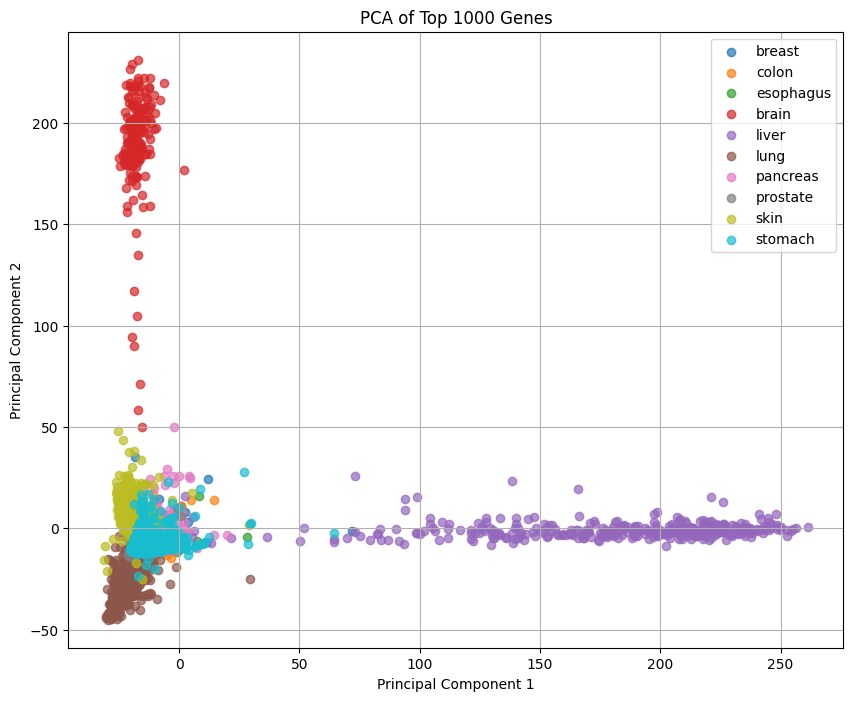

Explained variance ratio (first 10 components): [0.40642138 0.19330086 0.13491732 0.07767933 0.02633823 0.01407959
 0.0122921  0.00848792 0.00707567 0.00688558]
Cumulative explained variance (first 10 components): [0.40642138 0.59972224 0.73463956 0.81231889 0.83865712 0.85273671
 0.8650288  0.87351672 0.88059238 0.88747796]


In [30]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd  # Ensure pandas is imported

# X_selected already contains the scaled features (RobustScaler applied before ANOVA)

# Perform PCA with 10 components
pca = PCA(n_components=10)
principal_components = pca.fit_transform(X_selected)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(
    data=principal_components[:, [0, 1]],  # Use only the first 2 components for visualization
    columns=['PC1', 'PC2']
)

# Add tumor_type labels from scaled_data
pca_df['tumor_type'] = scaled_data['tumor_type'].values

# Plot the PCA results
plt.figure(figsize=(10, 8))
for tumor in pca_df['tumor_type'].unique():
    subset = pca_df[pca_df['tumor_type'] == tumor]
    plt.scatter(subset['PC1'], subset['PC2'], label=tumor, alpha=0.7)

plt.title('PCA of Top 1000 Genes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()

# Print explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio (first 10 components):", explained_variance_ratio)

# Optional: Cumulative explained variance
cumulative_variance = explained_variance_ratio.cumsum()
print("Cumulative explained variance (first 10 components):", cumulative_variance)

In [31]:
from catboost import CatBoostClassifier, Pool

In [32]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(diff_genes, test_size=0.3, shuffle=True)

In [33]:
#train_data.head(10)
test_data['tumor_type'].unique()
sum(test_data['tumor_type'] == 'breast')
#test_data.info()
#test_data.shape

338

In [34]:
X_train = train_data.drop(columns=['index', 'tumor_type']) #two brackets to create a dataframe
y_train = train_data['tumor_type']

X_test = test_data.drop(columns=['index', 'tumor_type'])
y_test = test_data['tumor_type']

In [35]:
model = CatBoostClassifier(iterations=1000,
                           depth=2,
                           learning_rate=0.1,
                           loss_function='MultiClass',
                           verbose=True)

In [36]:
# train the model
model.fit(X_train, y_train)

0:	learn: 2.0188334	total: 177ms	remaining: 2m 57s
1:	learn: 1.8835299	total: 247ms	remaining: 2m 3s
2:	learn: 1.7216512	total: 310ms	remaining: 1m 43s
3:	learn: 1.5658538	total: 379ms	remaining: 1m 34s
4:	learn: 1.4896441	total: 447ms	remaining: 1m 28s
5:	learn: 1.4005073	total: 512ms	remaining: 1m 24s
6:	learn: 1.3306019	total: 582ms	remaining: 1m 22s
7:	learn: 1.2318387	total: 651ms	remaining: 1m 20s
8:	learn: 1.1704147	total: 716ms	remaining: 1m 18s
9:	learn: 1.1213234	total: 780ms	remaining: 1m 17s
10:	learn: 1.0618442	total: 845ms	remaining: 1m 15s
11:	learn: 1.0078617	total: 911ms	remaining: 1m 15s
12:	learn: 0.9670589	total: 980ms	remaining: 1m 14s
13:	learn: 0.9217243	total: 1.05s	remaining: 1m 13s
14:	learn: 0.8901853	total: 1.11s	remaining: 1m 13s
15:	learn: 0.8560340	total: 1.19s	remaining: 1m 12s
16:	learn: 0.8315230	total: 1.27s	remaining: 1m 13s
17:	learn: 0.7770866	total: 1.35s	remaining: 1m 13s
18:	learn: 0.7539865	total: 1.41s	remaining: 1m 12s
19:	learn: 0.7246541	to

Accuracy: 0.9804216867469879

Classification Report:
               precision    recall  f1-score   support

       brain       1.00      1.00      1.00        56
      breast       1.00      0.99      1.00       338
       colon       0.99      1.00      1.00       137
   esophagus       0.87      0.74      0.80        54
       liver       1.00      0.99      1.00       108
        lung       0.99      0.99      0.99       160
    pancreas       1.00      0.96      0.98        57
    prostate       1.00      1.00      1.00       156
        skin       0.98      1.00      0.99       131
     stomach       0.89      0.95      0.92       131

    accuracy                           0.98      1328
   macro avg       0.97      0.96      0.97      1328
weighted avg       0.98      0.98      0.98      1328



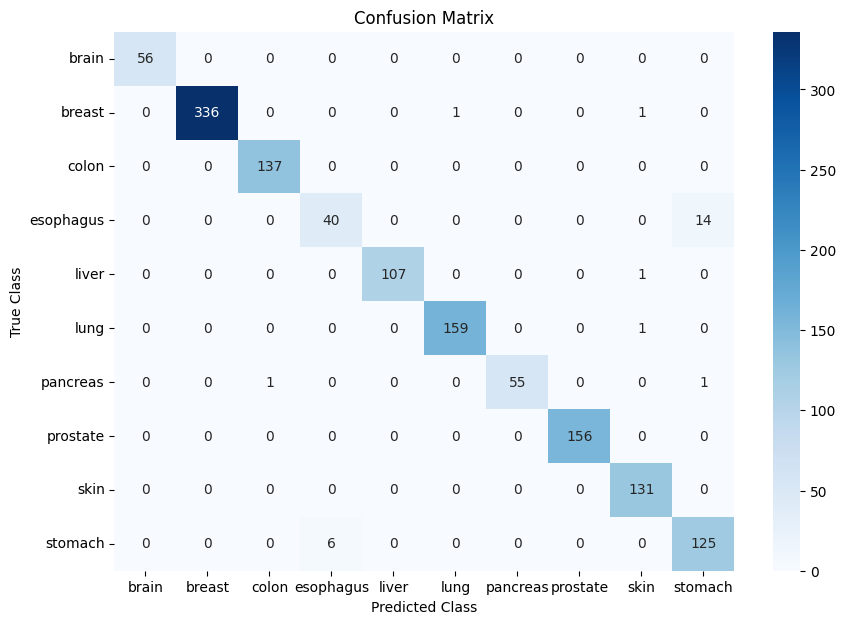

In [37]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Predictions
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, preds_class)
report = classification_report(y_test, preds_class)
conf_matrix = confusion_matrix(y_test, preds_class)

# Results
print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, preds_class)

# Plot using Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Class')
plt.ylabel('True Class')
plt.show()